<a href="https://colab.research.google.com/github/swagata87/school2024iop/blob/main/wdistance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image as im
import numpy as np
import os
import time
import random
#f = plt.figure()

In [2]:
random.seed(5)
np.set_printoptions(threshold=np.inf,precision=3, suppress=True,linewidth=np.inf)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from scipy.stats import wasserstein_distance


In [3]:
nums1 = []
nums2 = []
mu1 = 10
mu2 = 10
sigma1 = 5
sigma2 = 15
gen_event=100000
for i in range(gen_event):
    temp1 = random.gauss(mu1, sigma1)
    temp2 = random.gauss(mu2, sigma2)
    nums1.append(temp1)
    nums2.append(temp2)

weight= 1.0/gen_event
weights=np.full((gen_event), weight)


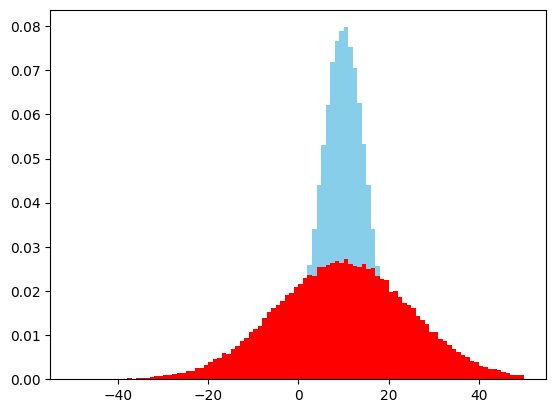

In [4]:
hh1, bins1,p =plt.hist(nums1, bins = 100,  color = "skyblue", range=(-50,50),weights=weights)
hh2, bins2,p =plt.hist(nums2, bins = 100,  color = "red", range=(-50,50) ,weights=weights)
#plt.show()
plt.show()


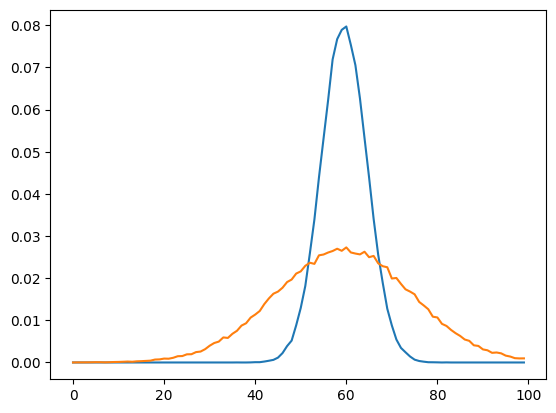

In [5]:
pdf1 = hh1 / sum(hh1)
pdf2 = hh2 / sum(hh2)

plt.plot(pdf1)
plt.plot(pdf2)
plt.show()



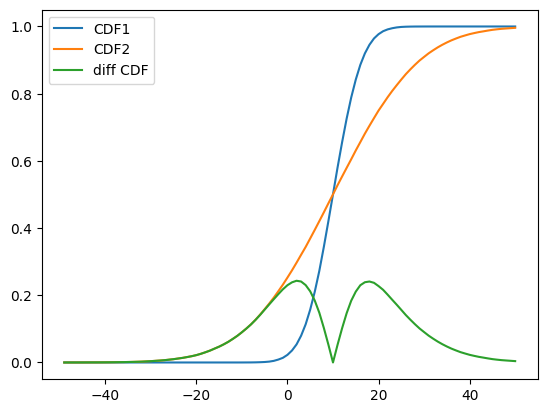

In [6]:
cdf1 = np.cumsum(hh1)
cdf2 = np.cumsum(hh2)
plt.plot(bins1[1:], cdf1, label="CDF1")
plt.plot(bins2[1:], cdf2, label="CDF2")
delta_cdf=abs(cdf1-cdf2)

plt.plot(bins2[1:], delta_cdf, label="diff CDF")
plt.legend()
plt.show()



In [7]:
delta_bin= abs(bins1[1] -bins1[0])

sumx=0
thelen=len(bins1)-1
print("number of bin is " , thelen)
for i in range(0,thelen):
    sumx=sumx+ delta_cdf[i]*delta_bin
    #print(i, bins1[i],sumx)
print("w distance (my implementation) = ", sumx/thelen)

print("w distance (available library) = " , wasserstein_distance(cdf1,cdf2))


number of bin is  100
w distance (my implementation) =  0.0792916000000131
w distance (available library) =  0.07929160000001309
